In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cryptocurrency/consolidated_coin_data.csv


# The dataset is about different Cryptocurrenies and their market capitalization and volume of each crypto currency on a given particular date. Their opening price, High, Low as well as Closing prices is also included in the dataset.

In [4]:
crypto = pd.read_csv("/kaggle/input/cryptocurrency/consolidated_coin_data.csv")
crypto

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0,"58,287,979"
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0,"65,604,596"
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0,"74,020,918"
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,"75,388,964"


In [5]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Currency    28944 non-null  object
 1   Date        28944 non-null  object
 2   Open        28944 non-null  object
 3   High        28944 non-null  object
 4   Low         28944 non-null  object
 5   Close       28944 non-null  object
 6   Volume      28944 non-null  object
 7   Market Cap  28944 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


#### The columns of the dataset are all of type - object, which needs to be converted into respective datatypes of better analysis and generating better results

#### Before converting, we need to replace the ',' between the numerical values to convert into numerical values

In [6]:
crypto['Volume'] = crypto['Volume'].str.replace(',','')
crypto

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752,"824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224,"853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097,"817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567,"828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667,"879,181,680"
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0,"58,287,979"
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0,"65,604,596"
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0,"74,020,918"
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,"75,388,964"


In [7]:
crypto['Market Cap'] = crypto['Market Cap'].str.replace(',','')
crypto

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752,824588509
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224,853213342
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097,817872179
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567,828296390
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667,879181680
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0,58287979
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0,65604596
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0,74020918
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,75388964


In [8]:
crypto['Date'] = pd.to_datetime(crypto['Date'])
crypto

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752,824588509
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224,853213342
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097,817872179
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567,828296390
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667,879181680
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,2013-05-02,3.78,4.04,3.01,3.37,0,58287979
28940,bitcoin-sv,2013-05-01,4.29,4.36,3.52,3.80,0,65604596
28941,bitcoin-sv,2013-04-30,4.40,4.57,4.17,4.30,0,74020918
28942,bitcoin-sv,2013-04-29,4.37,4.57,4.23,4.38,0,75388964


In [9]:
crypto['Open'] = crypto['Open'].str.replace(',','')
crypto['High'] = crypto['High'].str.replace(',','')
crypto['Low'] = crypto['Low'].str.replace(',','')
crypto['Close'] = crypto['Close'].str.replace(',','')

In [10]:
crypto['Open'] = crypto['Open'].astype(float)
crypto['High'] = crypto['High'].astype(float)
crypto['Low'] = crypto['Low'].astype(float)
crypto['Close'] = crypto['Close'].astype(float)

crypto['Volume'] = crypto['Volume'].astype(float)
crypto['Market Cap'] = crypto['Market Cap'].astype(float)

In [11]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  datetime64[ns]
 2   Open        28944 non-null  float64       
 3   High        28944 non-null  float64       
 4   Low         28944 non-null  float64       
 5   Close       28944 non-null  float64       
 6   Volume      28944 non-null  float64       
 7   Market Cap  28944 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.8+ MB


In [12]:
crypto['Day of Week'] = crypto['Date'].dt.day_name()
crypto

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,Day of Week
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752.0,824588509.0,Wednesday
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342.0,Tuesday
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179.0,Monday
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390.0,Sunday
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680.0,Saturday
...,...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,2013-05-02,3.78,4.04,3.01,3.37,0.0,58287979.0,Thursday
28940,bitcoin-sv,2013-05-01,4.29,4.36,3.52,3.80,0.0,65604596.0,Wednesday
28941,bitcoin-sv,2013-04-30,4.40,4.57,4.17,4.30,0.0,74020918.0,Tuesday
28942,bitcoin-sv,2013-04-29,4.37,4.57,4.23,4.38,0.0,75388964.0,Monday


In [13]:
crypto['Open-Close diff'] = crypto['Open'] - crypto['Close']
crypto

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,Day of Week,Open-Close diff
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752.0,824588509.0,Wednesday,0.04
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342.0,Tuesday,-0.05
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179.0,Monday,0.01
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390.0,Sunday,0.08
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680.0,Saturday,-0.02
...,...,...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,2013-05-02,3.78,4.04,3.01,3.37,0.0,58287979.0,Thursday,0.41
28940,bitcoin-sv,2013-05-01,4.29,4.36,3.52,3.80,0.0,65604596.0,Wednesday,0.49
28941,bitcoin-sv,2013-04-30,4.40,4.57,4.17,4.30,0.0,74020918.0,Tuesday,0.10
28942,bitcoin-sv,2013-04-29,4.37,4.57,4.23,4.38,0.0,75388964.0,Monday,-0.01


In [14]:
crypto['High-Low diff'] = crypto['High'] - crypto['Low']
crypto

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,Day of Week,Open-Close diff,High-Low diff
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752.0,824588509.0,Wednesday,0.04,0.07
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342.0,Tuesday,-0.05,0.11
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179.0,Monday,0.01,0.06
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390.0,Sunday,0.08,0.09
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680.0,Saturday,-0.02,0.06
...,...,...,...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,2013-05-02,3.78,4.04,3.01,3.37,0.0,58287979.0,Thursday,0.41,1.03
28940,bitcoin-sv,2013-05-01,4.29,4.36,3.52,3.80,0.0,65604596.0,Wednesday,0.49,0.84
28941,bitcoin-sv,2013-04-30,4.40,4.57,4.17,4.30,0.0,74020918.0,Tuesday,0.10,0.40
28942,bitcoin-sv,2013-04-29,4.37,4.57,4.23,4.38,0.0,75388964.0,Monday,-0.01,0.34


#### Finding any outliers are present in the dataset using 'describe' function

In [15]:
crypto.describe()

,Open,High,Low,Close,Volume,Market Cap,Open-Close diff,High-Low diff
count,28944.000000,28944.000000,28944.000000,28944.000000,2.894400e+04,2.894400e+04,28944.000000,28944.000000
mean,300.719915,309.832983,290.858557,300.947534,8.133058e+08,7.194826e+09,-0.227619,18.974426
std,1373.884681,1416.598573,1325.072633,1374.461221,3.059516e+09,2.469322e+10,73.970751,116.957327
min,0.001352,0.001509,0.001227,0.001357,0.000000e+00,0.000000e+00,-3633.600000,0.000000
25%,0.205108,0.212444,0.196527,0.205347,2.418700e+05,6.345143e+07,-0.030248,0.002237
50%,2.995000,3.090000,2.880000,2.980000,5.212684e+06,3.453673e+08,0.000000,0.110000
75%,24.430000,25.530000,23.270000,24.430000,1.554764e+08,3.422403e+09,0.040000,2.010000
max,19475.800000,20089.000000,18974.100000,19497.400000,5.350913e+10,3.265025e+11,2345.600000,4110.400000


#### Checking if any duplicate values are present in the dataset

In [16]:
num_duplicates = crypto.duplicated().sum()
num_duplicates

0

In [17]:
crypto['Currency'].unique()

array(['tezos', 'binance-coin', 'eos', 'bitcoin', 'tether', 'xrp',
       'bitcoin-cash', 'stellar', 'litecoin', 'ethereum', 'cardano',
       'bitcoin-sv'], dtype=object)

In [18]:
above_300 = crypto[crypto['Open']>300]
above_300

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,Day of Week,Open-Close diff,High-Low diff
7236,bitcoin,2019-12-04,7320.13,7539.78,7170.92,7252.03,2.166424e+10,1.311431e+11,Wednesday,68.10,368.86
7237,bitcoin,2019-12-03,7323.98,7418.86,7229.36,7320.15,1.479749e+10,1.323599e+11,Tuesday,3.83,189.50
7238,bitcoin,2019-12-02,7424.04,7474.82,7233.40,7321.99,1.708204e+10,1.323790e+11,Monday,102.05,241.42
7239,bitcoin,2019-12-01,7571.62,7571.62,7291.34,7424.29,1.872071e+10,1.342151e+11,Sunday,147.33,280.28
7240,bitcoin,2019-11-30,7764.06,7836.10,7515.85,7569.63,1.715819e+10,1.368294e+11,Saturday,194.43,320.25
...,...,...,...,...,...,...,...,...,...,...,...
23920,ethereum,2013-11-13,360.97,414.05,359.80,407.37,0.000000e+00,4.883103e+09,Wednesday,-46.40,54.25
23921,ethereum,2013-11-12,343.06,362.81,342.80,360.33,0.000000e+00,4.317726e+09,Tuesday,-17.27,20.01
23922,ethereum,2013-11-11,325.41,351.27,311.78,342.44,0.000000e+00,4.101635e+09,Monday,-17.03,39.49
23923,ethereum,2013-11-10,348.82,350.70,277.24,326.62,0.000000e+00,3.910613e+09,Sunday,22.20,73.46


In [19]:
crypto

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,Day of Week,Open-Close diff,High-Low diff
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752.0,824588509.0,Wednesday,0.04,0.07
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342.0,Tuesday,-0.05,0.11
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179.0,Monday,0.01,0.06
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390.0,Sunday,0.08,0.09
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680.0,Saturday,-0.02,0.06
...,...,...,...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,2013-05-02,3.78,4.04,3.01,3.37,0.0,58287979.0,Thursday,0.41,1.03
28940,bitcoin-sv,2013-05-01,4.29,4.36,3.52,3.80,0.0,65604596.0,Wednesday,0.49,0.84
28941,bitcoin-sv,2013-04-30,4.40,4.57,4.17,4.30,0.0,74020918.0,Tuesday,0.10,0.40
28942,bitcoin-sv,2013-04-29,4.37,4.57,4.23,4.38,0.0,75388964.0,Monday,-0.01,0.34


#### The data seems to be cleaned and ready for analysis

## 1. How does the market behave interms of Market capitalization and volume of transactions on each day of a week?

/tmp/ipykernel_35/107397462.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = crypto.groupby('Day of Week').mean()


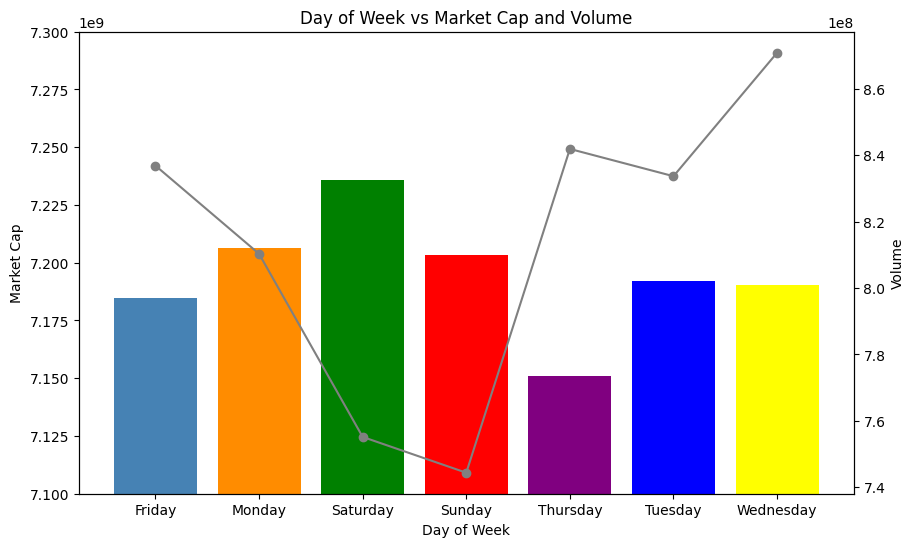

In [33]:
import matplotlib.pyplot as plt

grouped_data = crypto.groupby('Day of Week').mean()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a secondary y-axis

bar_color = ['steelblue', 'darkorange', 'green', 'red', 'purple', 'blue', 'yellow']
ax1.bar(grouped_data.index, grouped_data['Market Cap'], color=bar_color)
ax1.set_ylabel('Market Cap')

ax1.set_ylim(7100000000, 7300000000)

ax2.plot(grouped_data.index, grouped_data['Volume'], color='grey', marker='o')
ax2.set_ylabel('Volume')

ax1.set_xlabel('Day of Week')

plt.title('Day of Week vs Market Cap and Volume')

plt.xticks(rotation=45)

plt.show()

#### Strangely, the Market Cap seems to be inversely proportional to Volume. Higher the market cap, lower the Volume and vice-versa.
#### The Market cap seems to be higher on weekends and Volume is higher on non-weekends

## 2. How is the open-close and high-low differences behaving on each day of the week?

/tmp/ipykernel_35/669791216.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = crypto.groupby('Day of Week').mean()[['High-Low diff', 'Open-Close diff']]


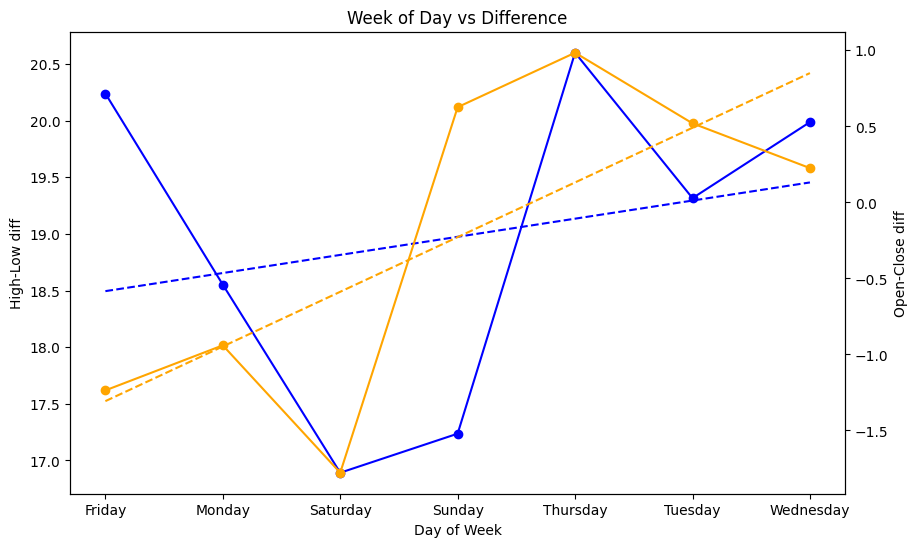

In [38]:
grouped_data = crypto.groupby('Day of Week').mean()[['High-Low diff', 'Open-Close diff']]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a secondary y-axis

ax1.plot(grouped_data.index, grouped_data['High-Low diff'], marker='o', color='blue', label='High-Low diff')
ax1.set_ylabel('High-Low diff')

ax2.plot(grouped_data.index, grouped_data['Open-Close diff'], marker='o', color='orange', label='Open-Close diff')
ax2.set_ylabel('Open-Close diff')

x = np.arange(len(grouped_data.index))
high_low_trend = np.polyfit(x, grouped_data['High-Low diff'], 1)
open_close_trend = np.polyfit(x, grouped_data['Open-Close diff'], 1)

ax1.plot(grouped_data.index, np.polyval(high_low_trend, x), color='blue', linestyle='--', label='High-Low Trend')
ax2.plot(grouped_data.index, np.polyval(open_close_trend, x), color='orange', linestyle='--', label='Open-Close Trend')

ax1.set_xlabel('Day of Week')

plt.title('Week of Day vs Difference')

plt.xticks(rotation=45)

plt.show()

#### Similar to the 'Volume' trend, both Open-Close and High-Low differences seems to be minimal on weekends and higher on weekdays

## 3. Which currency is having highest volume of transactions and popular among the market?

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


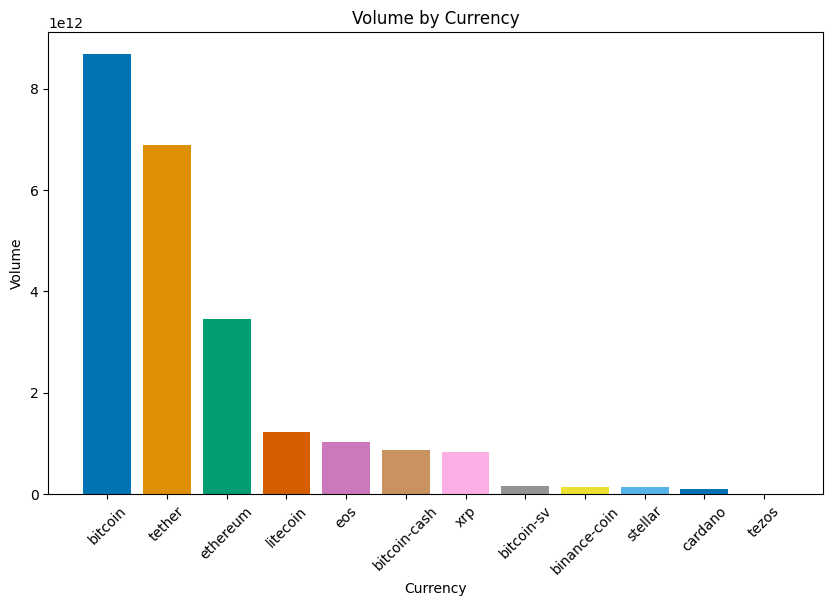

In [40]:
import seaborn as sns

grouped_data = grouped_data.sort_values(ascending=False)

# Get the number of currencies
num_currencies = len(grouped_data)

# Define a color palette
color_palette = sns.color_palette('colorblind', num_currencies)

# Plot the bar graph with colors
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values, color=color_palette)
plt.xlabel('Currency')
plt.ylabel('Volume')
plt.title('Volume by Currency')
plt.xticks(rotation=45)
plt.show()

#### From the above graph, bitcoin is leading in Volume followed by tether and ethereum

## 4. How has the market of the cryptocurrency behaved over the years?

/tmp/ipykernel_35/3311806330.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = crypto.groupby('Year').sum()[['Volume', 'Market Cap']]


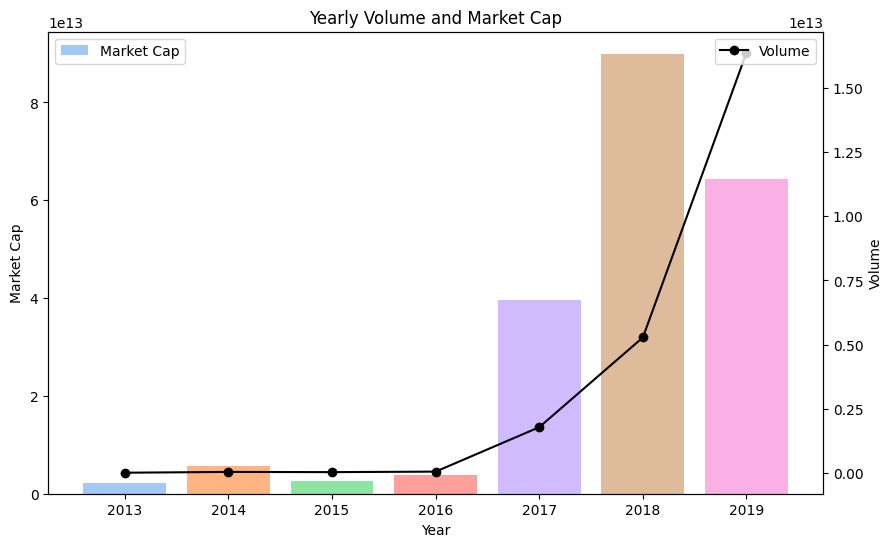

In [41]:
crypto['Year'] = crypto['Date'].dt.year

# Group the data by Year and calculate the sum of Volume and Market Cap for each year
grouped_data = crypto.groupby('Year').sum()[['Volume', 'Market Cap']]

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a secondary y-axis

# Define the color palette for the bar graph
color_palette = sns.color_palette('pastel', len(grouped_data))

# Plot the bar graph for Market Cap
ax1.bar(grouped_data.index, grouped_data['Market Cap'], color=color_palette)
ax1.set_ylabel('Market Cap')

# Plot the line graph for Volume
ax2.plot(grouped_data.index, grouped_data['Volume'], color='black', marker='o')
ax2.set_ylabel('Volume')

# Set X-axis labels as years
ax1.set_xlabel('Year')

# Set title and legends
plt.title('Yearly Volume and Market Cap')
ax1.legend(['Market Cap'], loc='upper left')
ax2.legend(['Volume'], loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the graph
plt.show()

#### The crypto market started in 2013 as per the dataset. Initially the market for crypto was low. It was in 2017 when people had recognized the potential of cryptocurreny and both Volume and Market Cap have seen drastic upsurge in both departments.